# Supervised Learning

## 2) Logistic Regression (classification)

### 1-1) Logistic Regression from scratch

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Step 1. Data Creation

## data ( height and weight of  adults and children)

In [ ]:
# The number of data to be created
m = 100

In [ ]:
adult_height = np.random.normal(175, 5, [m, 1])
adult_weight = np.random.normal(70, 5, [m, 1])

adult_dataset = np.concatenate( (adult_weight, adult_height) , axis = 1)

print(adult_dataset.shape)
print(adult_dataset[:5])

In [ ]:
child_height = np.random.normal(120, 5, [m, 1])
child_weight = np.random.normal(30, 5, [m, 1])

child_dataset = np.concatenate( (child_weight, child_height) , axis = 1)

print(child_dataset.shape)
print(child_dataset[:5])

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(adult_dataset[:,0], adult_dataset[:,1], c=np.array([(1, 1, 0)]))
ax1.scatter(child_dataset[:,0], child_dataset[:,1], c=np.array([(0, 1, 0)]))
plt.title("The distribution of created dataset ")
plt.xlabel("height x2")
plt.ylabel("weight x1")
plt.show()

## Label

In [ ]:
# 각각의 클레스에 대한 레이블을 만들어줍니다.
# adult는 1로, child는 0으로 지정합니다.
# binary classification은 내가 찾는 클래스(1)이냐 아니냐(0)를 분류합니다.
# 즉 우리가 학습시킬 모델은 성인과 성인이 아닌 데이터를 분류하는 모델입니다.

adult_label = np.ones( shape=[m, 1] )
child_label = np.zeros( shape=[m, 1] )
label = np.concatenate( (adult_label, child_label) )
print('label의 shape' , label.shape)
print(label[:10])

## Data + Label

In [ ]:
total_dataset = np.concatenate((adult_dataset , child_dataset))
total_dataset = np.concatenate( (total_dataset, label), axis = 1  )

np.random.shuffle(total_dataset) # Shuffle dataset
print(total_dataset[:10])
print(total_dataset.shape)

## simple scaling of dataset

In [ ]:
weight_mean= total_dataset[:, 0].mean()
height_mean= total_dataset[:, 1].mean()
total_dataset[:, 0] /= weight_mean
total_dataset[:, 1] /= height_mean

In [ ]:
total_dataset.shape

fig = plt.figure()
ax1 = fig.add_subplot(111)
color = [(1*i, 1, 0) for i in total_dataset[:,2] ]
ax1.scatter(total_dataset[:,0], total_dataset[:,1], c = color)
plt.show()

# Step 2. Model definition

In [ ]:
def hypothesis(x, w, b):
    pred = np.matmul(x, w.T) + b
    return pred

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
def cost(x, w, b, y):
    loss = -y*hypothesis(x, w, b) + np.log(1 + np.exp(hypothesis(x, w, b))) #-y*h(x) + log(1+exp(h(x)))
    cost = (1/m)*np.sum(loss)
    return cost

In [ ]:
def derivative(x, w, b, y):
    dw = -(1/m)* np.sum( x*(y - sigmoid(hypothesis(x, w, b))) , axis = 0) # 1 x w_dim
    db = -(1/m)* np.sum( y  - sigmoid(hypothesis(x, w, b)), axis = 0 )
    return dw, db

In [ ]:
def update(x, w, b, y, alpha):
    w = w - alpha*(derivative(x, w, b, y)[0]) # w := w + alpha * dw
    b = b - alpha*(derivative(x, w, b, y)[1]) # b := b + alpha * db
    return w, b

# Step 3. Training model

In [ ]:
# initialization of weights and bias
w = np.array([[0, 0]])
b = 0

x = total_dataset[:, :2] # x1, x2
y = total_dataset[:, 2:3] # label

## 아래 두 개 cell을 반복하여 실행하며, 선형 분류기의 위치 변화를 관찰해보세요.

In [ ]:
def train(_iter, x, w, b, y):
    for i in range(_iter):
        w, b = update(x, w, b, y, alpha=0.01)
    print ('cost =',cost(x, w, b, y))
    print ('w =',w)
    print ('b =',b)
    return w, b

def visualize(w, b):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    color = [(1*i, 1, 0) for i in total_dataset[:,2] ]
    ax1.scatter(total_dataset[:,0], total_dataset[:,1], c = color)

    p1 = np.array([0, -b/w[0, 1]])
    p2 = np.array([-b[0]/w[0, 0], 0]) # b has the shape as [1]
    coefficients = np.polyfit([p1[0], p2[0]], [p1[1][0], p2[1]], 1)  
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(0.5, 1.5)
    y_axis = polynomial(x_axis)
    ax1.set_ylim(0.5, 1.5)
    ax1.plot(x_axis, y_axis)

    plt.show()

In [ ]:
for i in range(15):
    w, b = train(200, x, w, b, y)
    visualize(w, b)

# 이런 문제는 어떨까요?

In [2]:
# 임의의 클래스 A와 클래스 B를 생성함.
m = 200
class_A = np.random.normal(0, 1, [m, 2])
label_A = np.ones([m, 1])

class_B_x = np.random.normal(0, 2, [m, 1])
class_B_y = 0.5*class_B_x**2 - 3

class_B = np.concatenate([class_B_x, class_B_y], axis = 1)
label_B = np.zeros([m, 1])

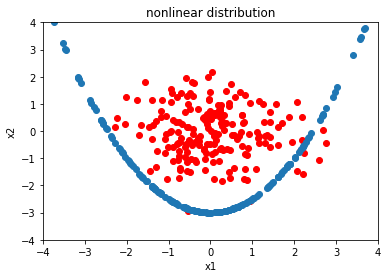

In [3]:
#데이터 분포를 볼까요?

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title('nonlinear distribution')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])

ax1.scatter(class_A[:,0], class_A[:,1], c='red')

ax1.scatter(class_B[:,0], class_B[:,1])
plt.show()

In [4]:
import tensorflow as tf

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [9]:
#데이터의 shape을 볼까요?
print(x_train.shape)

(60000, 28, 28)


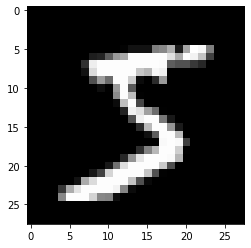

In [12]:
# 60000개 중 첫번째 데이터를 봅시다.
img = x_train[0]
plt.imshow(img, cmap='gray')
plt.show()

In [13]:
# 값도 출력해봅시다.
print(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [20]:
# 값도 출력해봅시다.
vectorized = np.reshape(img, [28*28])

In [22]:
vectorized.shape

(784,)

In [24]:
#이런 데이터도 잘 분류될 수 있을까?
print(vectorized)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   